## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [9]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [10]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [12]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 44us/step - loss: 2.2678 - accuracy: 0.1790 - val_loss: 2.2180 - val_accuracy: 0.2146
Epoch 2/500
50000/50000 [==============================] - 2s 41us/step - loss: 2.1863 - accuracy: 0.2339 - val_loss: 2.1556 - val_accuracy: 0.2544
Epoch 3/500
50000/50000 [==============================] - 2s 42us/step - loss: 2.1290 - accuracy: 0.2637 - val_loss: 2.1038 - val_accuracy: 0.2746
Epoch 4/500
50000/50000 [==============================] - 2s 41us/step - loss: 2.0823 - accuracy: 0.2807 - val_loss: 2.0623 - val_accuracy: 0.2906
Epoch 5/500
50000/50000 [==============================] - 2s 41us/step - loss: 2.0445 - accuracy: 0.2932 - val_loss: 2.0281 - val_accuracy: 0.2980
Epoch 6/500
50000/50000 [==============================] - 2s 41us/step - loss: 2.0133 - accuracy: 0.3014 - val_loss: 2.0005 - val_accuracy: 0.3069
Epoch 7/500
50000/50000 [==============================] - 2s 

Epoch 56/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6586 - accuracy: 0.4200 - val_loss: 1.6681 - val_accuracy: 0.4156
Epoch 57/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6555 - accuracy: 0.4209 - val_loss: 1.6620 - val_accuracy: 0.4199
Epoch 58/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6527 - accuracy: 0.4225 - val_loss: 1.6618 - val_accuracy: 0.4197
Epoch 59/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6498 - accuracy: 0.4242 - val_loss: 1.6561 - val_accuracy: 0.4185
Epoch 60/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6466 - accuracy: 0.4258 - val_loss: 1.6589 - val_accuracy: 0.4208
Epoch 61/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6441 - accuracy: 0.4253 - val_loss: 1.6515 - val_accuracy: 0.4232
Epoch 62/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6408 - accuracy: 0.4274

Epoch 111/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.5288 - accuracy: 0.4675 - val_loss: 1.5530 - val_accuracy: 0.4551
Epoch 112/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.5267 - accuracy: 0.4681 - val_loss: 1.5510 - val_accuracy: 0.4564
Epoch 113/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.5248 - accuracy: 0.4689 - val_loss: 1.5502 - val_accuracy: 0.4567
Epoch 114/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.5231 - accuracy: 0.4694 - val_loss: 1.5489 - val_accuracy: 0.4570
Epoch 115/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.5217 - accuracy: 0.4709 - val_loss: 1.5491 - val_accuracy: 0.4557
Epoch 116/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.5195 - accuracy: 0.4705 - val_loss: 1.5484 - val_accuracy: 0.4525
Epoch 117/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.5178 - accuracy:

50000/50000 [==============================] - 2s 41us/step - loss: 1.4401 - accuracy: 0.4970 - val_loss: 1.4931 - val_accuracy: 0.4734
Epoch 166/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4383 - accuracy: 0.4981 - val_loss: 1.4848 - val_accuracy: 0.4749
Epoch 167/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4368 - accuracy: 0.4974 - val_loss: 1.4887 - val_accuracy: 0.4729
Epoch 168/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4349 - accuracy: 0.4991 - val_loss: 1.4855 - val_accuracy: 0.4758
Epoch 169/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4338 - accuracy: 0.4995 - val_loss: 1.4829 - val_accuracy: 0.4735
Epoch 170/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4322 - accuracy: 0.4997 - val_loss: 1.4777 - val_accuracy: 0.4779
Epoch 171/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4304 - accuracy: 0.4994 - val_

Epoch 220/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.3654 - accuracy: 0.5234 - val_loss: 1.4369 - val_accuracy: 0.4912
Epoch 221/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.3641 - accuracy: 0.5230 - val_loss: 1.4333 - val_accuracy: 0.4925
Epoch 222/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.3622 - accuracy: 0.5231 - val_loss: 1.4392 - val_accuracy: 0.4878
Epoch 223/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.3609 - accuracy: 0.5235 - val_loss: 1.4503 - val_accuracy: 0.4852
Epoch 224/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.3603 - accuracy: 0.5246 - val_loss: 1.4376 - val_accuracy: 0.4859
Epoch 225/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.3589 - accuracy: 0.5237 - val_loss: 1.4527 - val_accuracy: 0.4824
Epoch 226/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.3574 - accuracy:

50000/50000 [==============================] - 2s 41us/step - loss: 1.2997 - accuracy: 0.5450 - val_loss: 1.4030 - val_accuracy: 0.4957
Epoch 275/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2984 - accuracy: 0.5456 - val_loss: 1.4002 - val_accuracy: 0.4996
Epoch 276/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2974 - accuracy: 0.5451 - val_loss: 1.4122 - val_accuracy: 0.4994
Epoch 277/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2964 - accuracy: 0.5455 - val_loss: 1.4121 - val_accuracy: 0.4989
Epoch 278/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2959 - accuracy: 0.5461 - val_loss: 1.3956 - val_accuracy: 0.5075
Epoch 279/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2943 - accuracy: 0.5471 - val_loss: 1.4019 - val_accuracy: 0.4991
Epoch 280/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2929 - accuracy: 0.5475 - val_

Epoch 329/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2399 - accuracy: 0.5673 - val_loss: 1.3824 - val_accuracy: 0.5082
Epoch 330/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2389 - accuracy: 0.5664 - val_loss: 1.3715 - val_accuracy: 0.5093
Epoch 331/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2372 - accuracy: 0.5681 - val_loss: 1.3825 - val_accuracy: 0.5121
Epoch 332/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2362 - accuracy: 0.5677 - val_loss: 1.3713 - val_accuracy: 0.5138
Epoch 333/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2352 - accuracy: 0.5671 - val_loss: 1.3710 - val_accuracy: 0.5125
Epoch 334/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2351 - accuracy: 0.5669 - val_loss: 1.3955 - val_accuracy: 0.5062
Epoch 335/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2336 - accuracy:

50000/50000 [==============================] - 2s 41us/step - loss: 1.1834 - accuracy: 0.5855 - val_loss: 1.3711 - val_accuracy: 0.5157
Epoch 384/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1820 - accuracy: 0.5865 - val_loss: 1.3842 - val_accuracy: 0.5065
Epoch 385/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.1832 - accuracy: 0.5870 - val_loss: 1.4212 - val_accuracy: 0.4946
Epoch 386/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1801 - accuracy: 0.5850 - val_loss: 1.3627 - val_accuracy: 0.5171
Epoch 387/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1817 - accuracy: 0.5870 - val_loss: 1.3573 - val_accuracy: 0.5174
Epoch 388/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1803 - accuracy: 0.5877 - val_loss: 1.3686 - val_accuracy: 0.5148
Epoch 389/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1789 - accuracy: 0.5866 - val_

Epoch 438/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1301 - accuracy: 0.6062 - val_loss: 1.3514 - val_accuracy: 0.5252
Epoch 439/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1291 - accuracy: 0.6051 - val_loss: 1.3605 - val_accuracy: 0.5138
Epoch 440/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1274 - accuracy: 0.6071 - val_loss: 1.3504 - val_accuracy: 0.5254
Epoch 441/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1272 - accuracy: 0.6065 - val_loss: 1.3518 - val_accuracy: 0.5199
Epoch 442/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1247 - accuracy: 0.6074 - val_loss: 1.3577 - val_accuracy: 0.5174
Epoch 443/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1260 - accuracy: 0.6060 - val_loss: 1.3611 - val_accuracy: 0.5182
Epoch 444/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1233 - accuracy:

50000/50000 [==============================] - 2s 41us/step - loss: 1.0784 - accuracy: 0.6237 - val_loss: 1.3872 - val_accuracy: 0.5127
Epoch 493/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.0795 - accuracy: 0.6238 - val_loss: 1.3957 - val_accuracy: 0.5046
Epoch 494/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.0799 - accuracy: 0.6225 - val_loss: 1.3543 - val_accuracy: 0.5186
Epoch 495/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.0760 - accuracy: 0.6261 - val_loss: 1.3845 - val_accuracy: 0.5140
Epoch 496/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.0742 - accuracy: 0.6252 - val_loss: 1.3998 - val_accuracy: 0.5153
Epoch 497/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.0744 - accuracy: 0.6251 - val_loss: 1.3292 - val_accuracy: 0.5271
Epoch 498/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.0714 - accuracy: 0.6253 - val_

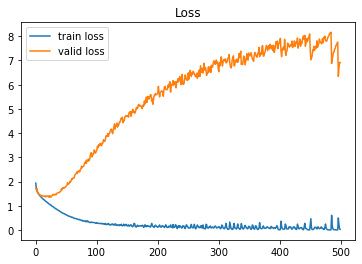

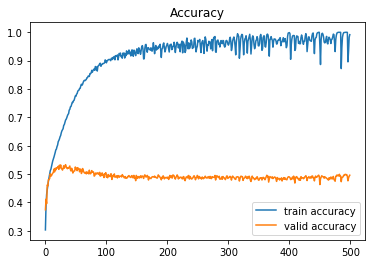

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()